# Nadaraya-Watson Regression

This is the classic machine learnin algorithm commonly used for noise reduction.<br>
It's based on idea of distance metrics (eg. euclidean distanece) between objects and k-neighbors. 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generate dataset

Use normal distribution for noise

In [2]:
def generate_dataset(min_x = -20, max_x = 20):
    x = np.arange(min_x, max_x, 0.2)

    y = np.sin(x) + np.random.normal(2, 0.4, len(x))
    return x,y

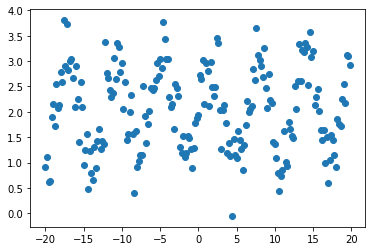

In [3]:
x,y = generate_dataset()
plt.scatter(x, y)

## Define metrics

In [4]:
def euclidean_distance(x_i, x):
    distance = np.sqrt(np.square(x - x_i))
    return distance

## Kernels

This method use idea of kernels: model uses function  instead of objects weights. <br>
That function call "<b>Kernel</b>". <br>


In [5]:
def gauss_kernel(r):
    return np.exp(-2*np.square(r))

def triangle_kernel(r):
    kernel  = 1 - np.abs(r)
    return kernel if np.abs(r) <= 1 else 0

def square_kernel(r):
    kernel  = 1 - np.square(r)
    return kernel if np.abs(r) <= 1 else 0

## Define Nadaraya-Watson kernel smoothing

In [6]:
def nadaraya_watson_kernel_smoothing(x, X, Y, kernel, window, distance_metric):
    
    kernel_operation = lambda xi: kernel(distance_metric(x, xi) / window)
    
    X_kerneled = np.array( [ kernel_operation(x_i) for x_i in X ] )
    
    return np.dot(y, X_kerneled) / sum(X_kerneled)

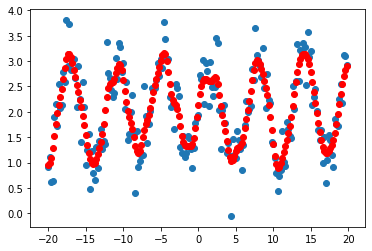

In [7]:
window = 0.8
kernel = gauss_kernel
distance_metric = euclidean_distance
smoothing = nadaraya_watson_kernel_smoothing

y_hat = np.array( [ smoothing(x_i, x, y, kernel, window, distance_metric) for x_i in x ] ).reshape((-1, ))

plt.scatter(x, y)
plt.scatter(x, y_hat, c='red')